## THE TRAPPING RAIN WATER PROBLEM

<p><b>Summary</b></p>
<p>The trapping rainwater problem involves finding the number of units that can trap water in given elevation map. The map contains a series of bars, each of unit size aligned in some sequence, with or without empty spaces in between.  The total number of bars (x-axis) can be different. The bars can be of different integer heights (y-axis value). The task is to fill the elevation map with rain water (colored blue in the given figure). Water can only get filled if there are boundaries on both ends and up to specific heights (just like you can only fill a bucket until its maximum height). The height of the bars must be non-negative. The solution should be the number of units that are trapped. The problem was solved using Python Programming language and Jupyter notebooks (files are attached).

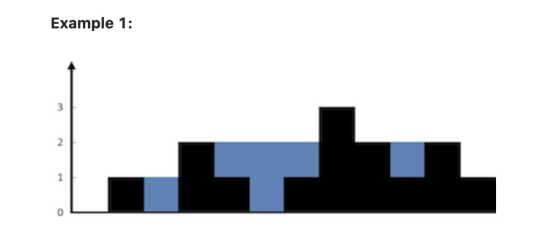

Image source and problem description: https://leetcode.com/problems/trapping-rain-water/description/

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
    
def traprainwater(data):
    
    
    #if any of the integers in "data" input array are negative, terminate
    def has_negative_values(lst):
        return len(list(filter(lambda x: x < 0, lst))) > 0
    if has_negative_values(data):
        print("The entered list has at least one negative value. PLEASE CHECK!")
        return
    
    countofvalids=[0]*len(data)  #I create a list of zeros, the size of the input data
    # I create an array of zeros that will check if an index has been evaluated. It will have a 0 if no and 1 if yes
    done=[0]*len(data) 
    
    
    
    #Here I look at the input data, and assess the first element and compare it to the value after it
    #I also look at the last element and compare it to the value before it
    #1. Last element : if the last element is less than the one before it, then count is as 1 (index will not be evaluated)
    if data[-1] < data[-2]:
        done[-1]=1
    #2. First element : if the first element is less than the one after it, then count is as 1 (index will not be evaluated)
    #count it as done
    if data[0] < data[1]:
        done[0]=1
    
    
    #We begin by searching for the largest value in the list
    currentmax=max(data)
    #And the index corresponding to the largest value in the list
    idxcurrmax=data.index(max(data))

    
    
    
    
    #the function find_lefttmost_max_from_index takes the list and returns the highest value to the
    #left of the global maximum value identified, as well as the index (I will refer to it at "left local maximum")
    def find_lefttmost_max_from_index(lst, end_index):
        if end_index < 0 or end_index >= len(lst):
            # Handle invalid start index
            return None
        
        end_index-=1   #because I dont want to include the index of the current max when evaluating
        
        sublist = lst[:end_index] # I create a sublist (array) of values from the beginning to just before the global maximum
         
        # if the sublist turns out to be empty, then that means the "local" maximum to the left of the global
        # maximum is at index 0
        if not sublist: 
            max_leftindex=0
            max_leftvalue=done[0]
        else:
            max_leftvalue = max(sublist) #the maximum value in the sublist
            
            #this is making sure that if to the left of the global maximum, there are 2 or more "local" maxima
            #I want to take the one furthest to the left
            for i in range(0,len(sublist),1):
                if sublist[i] == max_leftvalue:
                    leftmost_index = i
                    break
            max_leftindex=leftmost_index
        return max_leftvalue, max_leftindex #return the local maximum to the left of the global maximum and its index  
    
    max_leftvalue, idxleftmax=find_lefttmost_max_from_index(data, idxcurrmax) #using the function
    
    
    
    
    #After obtaining the local maximum to the left of the global maximum and its index, I 
    #evaluate all values from the "left local maximum" to the global maximum.
    
    for i in range(idxleftmax+1,idxcurrmax):  #except if the global maximum also happens to be equal to the "Left local maximum"
        if idxcurrmax == idxleftmax and idxcurrmax==0:
              done[0]=1                       #in which case that index will not be evaluated  
    #The solution set is then filled (or water is trapped) starting from the "left local maximum" to the global maximum
    #based on the height of each cell and not exceeding the "left local maximum" height
        else:
            newcount=max(0,data[idxleftmax]-data[i]) 
            countofvalids[i]=newcount
            done[i]=1
            done[i-1]=1 
            
     
    
    #the function find_rightmost_max_from_index from_index takes the list and returns the highest value to the
    #right of the global maximum value identified, as well as the index (I will refer to it at "right local maximum")
    
    def find_rightmost_max_from_index(lst, start_index):
        
        
        if start_index==len(data) - 1:  # if the global maximum also turns out to be the right most value , then I dont need to
                                        # #evaluate it
            max_rightvalue, max_rightindex= data[-1], data.index(data[-1])
        else:
            
            start_index+=1              #start evaluating from the index just to the right of the global max
            
            if start_index < 0 or start_index >= len(lst): # Handle invalid start index
                return None
        
            sublist = lst[start_index:]  # I create a sublist of values from just after the global maximum to the end
            
            if not sublist: # Handle empty sublist
                return None
        
            
            max_rightvalue = max(sublist) #find the largest value in that sublist
            for i in range(len(sublist) - 1, -1, -1):
                if sublist[i] == max_rightvalue:
                    rightmost_index = i   #we move through the sublist to make sure if there are more than one "right 
                    break                 #we are selecting the right most local maximum
            max_rightindex=start_index + rightmost_index #the index of the "right local maximum" will then be the 
                                                         #start index + the index based on the sublist
        
        return max_rightvalue, max_rightindex
      
    max_rightvalue, idxrightmax=find_rightmost_max_from_index(data, idxcurrmax) #using the function
    
    
    #After obtaining the local maximum to the right of the global maximum and its index, I 
    #evaluate all values from the global maximum to the "right local maximum".
    for i in range(idxcurrmax, idxrightmax):
        if idxcurrmax == idxrightmax:         #if the max value is also the last value to the right mark as complete in 
            done[-1]=1                        #mark as done
        else:
       #The solution set is then filled (or water is trapped) starting from the global maximum to the "right local maximum" 
       #based on the height of each cell and not exceeding the "right local maximum" height        
            newcount=max(0,data[idxrightmax]-data[i])
            countofvalids[i]=newcount
            done[i]=1
            done[i+1]=1
    
     
    
    #WHAT IS LEFT
    #what is left is if there is any water trapped to the left of the "left local maximum"
    #or to the right of the "right local maximum"
    for i in range(0,len(done)-1):
        #i use the "done" array to check if there are any indices not yet evaluated
        
    
        if done[i]==0 and done[i+1]==0:  # I look for 2 consecutive zeros in the done array
            #if the two zeros are in the second and third index
            #and the first index is already evaluated (done[0]=1)
            if done.index(done[i])==1 and done[0]==1: #then (similar to the figure shown above, we check if water can be filled there
                if data[i] > data[i+1]:               #and the 3rd index data is smaller than the second index data
                    countofvalids[i+1]=max(0, data[i]-data[i+1])  #then fill the 3rd index up to the height of the second
                    done[i]=1
                    done[i+1]=1
                    
            elif done.index(done[i])==done[-3] and done[-1]==1:  #if you have 2 consecutive zeros in the done array in the second last                                                 
                if data[i] < data[i+1]:                          #and third last position then fill the third last position with water
                    countofvalids[i]=max(0, data[i+1]-data[i])   #up to the height of the second last position
                    done[i]=1
                    done[i+1]=1                
                    
        
    
                
    print("Height :", data, "Solution : ", sum(countofvalids))
        

## Testing with the 2 examples given in the question

In [3]:
#1
#Ans is 6
traprainwater([0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1])

Height : [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1] Solution :  6


In [4]:
#2
#Ans is 9
traprainwater([4, 2, 0, 3, 2, 5])

Height : [4, 2, 0, 3, 2, 5] Solution :  9


## Testing with other possibilities

In [5]:
#3
#having the maximum value at the beginning and end
#Ans is 13
traprainwater([5, 2, 0, 3, 2, 5])

Height : [5, 2, 0, 3, 2, 5] Solution :  13


In [6]:
#4
#Multiple max values
#Ans is 14
traprainwater([5, 1, 5, 0, 5, 3, 2, 5])

Height : [5, 1, 5, 0, 5, 3, 2, 5] Solution :  14


In [7]:
#5
#Declining values at the end
#Ans is 9
traprainwater([5, 1, 5, 0, 5, 3, 2, 1])

Height : [5, 1, 5, 0, 5, 3, 2, 1] Solution :  9


## Testing with 12 randomly generated lists

In [8]:
#INPUT

# def generate_random_list():
#     list_size = random.randint(3, 10)  # Random size between 3 and 10
#     random_list = [random.randint(0, 10) for _ in range(list_size)]  # Random integers between 1 and 100
#     return random_list
# #random.seed(10)

# #random_list = generate_random_list()

# for i in range(0,12):
#     print("Random List #rand{}:".format(i+1), generate_random_list())

# #OUTPUT
# Random List #rand1: [1, 6, 9, 5, 4, 9, 2, 3]
# Random List #rand2: [4, 1, 8, 0, 3]
# Random List #rand3: [6, 3, 9, 9]
# Random List #rand4: [9, 0, 6, 3, 5, 9, 3, 8, 9, 5]
# Random List #rand5: [10, 9, 0]
# Random List #rand6: [9, 5, 6]
# Random List #rand7: [9, 10, 2, 2, 1, 9, 5, 2]
# Random List #rand8: [8, 8, 5]
# Random List #rand9: [6, 7, 9, 5]
# Random List #rand10: [2, 7, 7]
# Random List #rand11: [7, 9, 2, 5, 6, 5, 8, 8, 7, 6]
# Random List #rand12: [1, 6, 10, 2, 0, 2]


In [9]:
#rand1:
# Correct answer is 9
traprainwater([1, 6, 9, 5, 4, 9, 2, 3])

Height : [1, 6, 9, 5, 4, 9, 2, 3] Solution :  9


In [10]:
#rand2:
#Correct answer is 6
traprainwater([4, 1, 8, 0, 3])

Height : [4, 1, 8, 0, 3] Solution :  6


In [11]:
#rand3:
#Correct answer is 3
traprainwater([6, 3, 9, 9])

Height : [6, 3, 9, 9] Solution :  3


In [12]:
#rand4
#Correct answer is 29
traprainwater([9, 0, 6, 3, 5, 9, 3, 8, 9, 5])

Height : [9, 0, 6, 3, 5, 9, 3, 8, 9, 5] Solution :  29


In [13]:
#rand5
#Correct answer is 0
traprainwater([10, 9, 0])

Height : [10, 9, 0] Solution :  0


In [14]:
#rand6
#Correct answer is 1
traprainwater([9, 5, 6])

Height : [9, 5, 6] Solution :  1


In [15]:
#rand7
#Correct answer is 22
traprainwater([9, 10, 2, 2, 1, 9, 5, 2])

Height : [9, 10, 2, 2, 1, 9, 5, 2] Solution :  22


In [16]:
#rand8
#Correct answer is 0
traprainwater([8, 8, 5])

Height : [8, 8, 5] Solution :  0


In [17]:
#rand9
#Correct answer is 0
traprainwater([6, 7, 9, 5])

Height : [6, 7, 9, 5] Solution :  0


In [18]:
#rand10
#Correct answer is 0
traprainwater([2, 7, 7])

Height : [2, 7, 7] Solution :  0


In [19]:
#rand11
#Correct answer is 14
traprainwater([7, 9, 2, 5, 6, 5, 8, 8, 7, 6])

Height : [7, 9, 2, 5, 6, 5, 8, 8, 7, 6] Solution :  14


In [20]:
#rand12
#Correct answer is 2
traprainwater([1, 6, 10, 2, 0, 2])

Height : [1, 6, 10, 2, 0, 2] Solution :  2


#### Other testing

In [21]:
#6
traprainwater([0, 1, 0, 4, 0, 0, 7,2])

Height : [0, 1, 0, 4, 0, 0, 7, 2] Solution :  9


In [22]:
#7
traprainwater([0, 1, 0, 0, 0, 4, 0, 0, 6,0, 0, 2])

Height : [0, 1, 0, 0, 0, 4, 0, 0, 6, 0, 0, 2] Solution :  13


In [23]:
#8 If it has negative values
traprainwater([0, 1, -4, 0, 0, 4, 0, 0, 6,0, 0, 2])

The entered list has at least one negative value. PLEASE CHECK!


## Time complexity

In [24]:
import time

start = time.time()


#Consisider the input array originally given
input_dt=[1, 6, 9, 5, 4, 9, 2, 3]
time=[]
size=[]
time_taken=[]

count=0
while count <=20:
    #record start time
    size.append(len(input_dt))
    import time
    start_time = time.time()    #start the clock
    traprainwater(input_dt)     #run the function
    end_time = time.time()      #record end time
    elapsed_time= end_time - start_time  #time taken in seconds
    time_taken.append(elapsed_time)
    input_dt=input_dt*2
    count +=1



Height : [1, 6, 9, 5, 4, 9, 2, 3] Solution :  9
Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3] Solution :  42
Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3] Solution :  108
Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3] Solution :  240
Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3] Solution :  504
Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3,

Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 

Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 

Height : [1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 9, 5, 4, 9, 2, 3, 1, 6, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

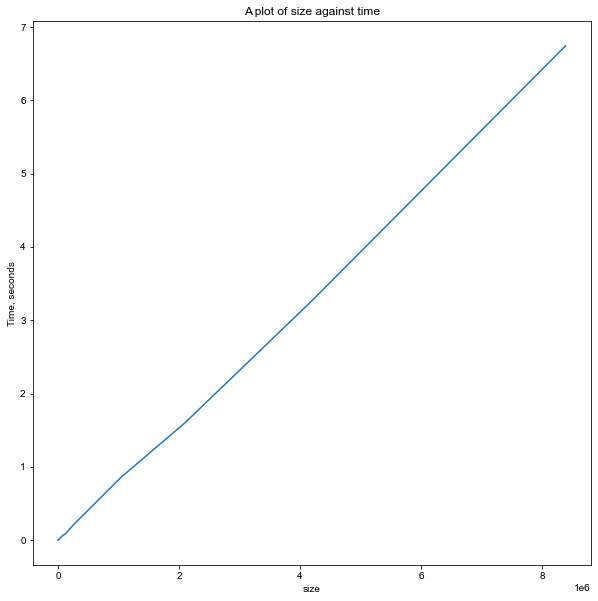

In [25]:
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10,10))
plt.plot(size, time_taken)
plt.xlabel("size")
plt.ylabel("Time, seconds")
plt.title("A plot of size against time")
plt.title

In [26]:
size

[8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288,
 1048576,
 2097152,
 4194304,
 8388608]

In [27]:
time_taken

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.000997304916381836,
 0.0,
 0.0009968280792236328,
 0.0019943714141845703,
 0.0029954910278320312,
 0.006978273391723633,
 0.012966156005859375,
 0.027928590774536133,
 0.054851531982421875,
 0.09475207328796387,
 0.21741938591003418,
 0.4318430423736572,
 0.8636891841888428,
 1.6007206439971924,
 3.2642385959625244,
 6.742342710494995]

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

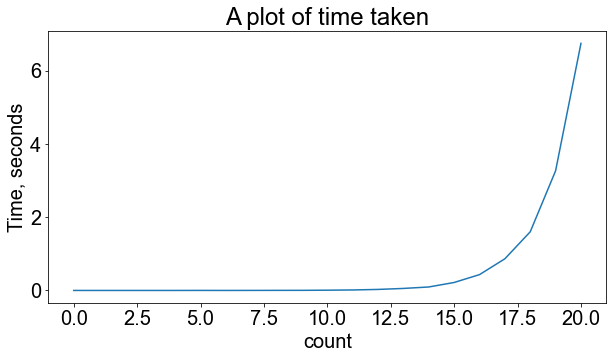

In [28]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10,5))
plt.plot(time_taken)
plt.xlabel("count")
plt.ylabel("Time, seconds")
plt.title("A plot of time taken")
plt.title